## **Pip install packages**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydot

In [3]:
!pip install pydotplus

In [4]:
!pip3 install graphviz

# **Classification Question PART A**

Classification probelm on GTZAN dataset

### **Model Imports and Basic Preprocessing**

In [6]:
import tensorflow
import pandas as pd
import time
import numpy as np
import pylab as plt
import multiprocessing as mp
import statistics

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [7]:
# read the data using pandas
df = pd.read_csv('/content/drive/MyDrive/NNDL/features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
# get the number of values for each category
df['label'].value_counts()

jazz         100
disco        100
hiphop       100
reggae       100
rock         100
classical    100
pop          100
metal        100
blues        100
country      100
Name: label, dtype: int64

In [9]:
# get the number of categories as well the unique categories of labels that need to be classified
print("Number of categories: ", df['label'].nunique())
print("The categories are: ", df["label"].unique())

Number of categories:  10
The categories are:  ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [10]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [11]:
# prepare the dataset and get the train and test datasets

X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


## **QUESTION 1**

### **QUESTION 1a)** ###

In [13]:
#model definition for the feedforward network.
def feed_forward_network():
  # the number of neurons used in each layer. 
  hidden_neurons = 16

  #model architecture defines using keras sequential
  model = Sequential()
  model.add(Dense(hidden_neurons, activation='relu')) # dense input layer relu activation function and specified number of neurons
  model.add(Dropout(0.3))                             # dropout layers with probability 0.3
  model.add(Dense(10, activation='softmax'))         # output layer with output dim 10, activation function softmax

  # compile model using adam optimizer and metrics accruacy. 
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # train the model with batch size 1 for 50 epochs
  history = model.fit(X_train, y_train,
                      batch_size=1,
                      epochs=50,
                      verbose=2,
                      use_multiprocessing=False,
                      validation_data=(X_test, y_test))
  return history

In [14]:
# train the feed forward network. 
feed_forward_network_results = feed_forward_network()

Epoch 1/50
700/700 - 2s - loss: 2.2200 - accuracy: 0.1971 - val_loss: 1.8777 - val_accuracy: 0.3267
Epoch 2/50
700/700 - 1s - loss: 1.7098 - accuracy: 0.4057 - val_loss: 1.5889 - val_accuracy: 0.4000
Epoch 3/50
700/700 - 1s - loss: 1.5578 - accuracy: 0.4200 - val_loss: 1.4568 - val_accuracy: 0.4533
Epoch 4/50
700/700 - 1s - loss: 1.4027 - accuracy: 0.5014 - val_loss: 1.3356 - val_accuracy: 0.5300
Epoch 5/50
700/700 - 1s - loss: 1.2794 - accuracy: 0.5500 - val_loss: 1.2683 - val_accuracy: 0.5533
Epoch 6/50
700/700 - 1s - loss: 1.2051 - accuracy: 0.5529 - val_loss: 1.2192 - val_accuracy: 0.5833
Epoch 7/50
700/700 - 1s - loss: 1.2305 - accuracy: 0.5671 - val_loss: 1.1502 - val_accuracy: 0.6000
Epoch 8/50
700/700 - 1s - loss: 1.1415 - accuracy: 0.6000 - val_loss: 1.1481 - val_accuracy: 0.5867
Epoch 9/50
700/700 - 1s - loss: 1.1164 - accuracy: 0.5843 - val_loss: 1.1147 - val_accuracy: 0.6133
Epoch 10/50
700/700 - 1s - loss: 1.0779 - accuracy: 0.6143 - val_loss: 1.0749 - val_accuracy: 0.6233

### **QUESTION 1b)** ###

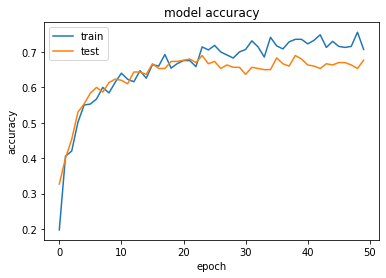

In [15]:
# plotting the model training accuracy and validation accuracy
plt.figure(1)
plt.plot(feed_forward_network_results.history['accuracy'])
plt.plot(feed_forward_network_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **QUESTION 1c)** ###

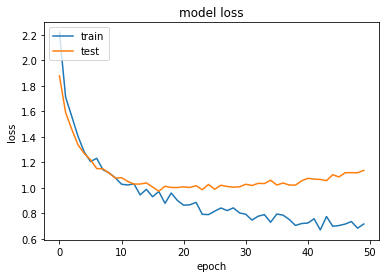

In [16]:
# plotting the model training losses and validation losses. 
plt.figure(2)
plt.plot(feed_forward_network_results.history['loss'])
plt.plot(feed_forward_network_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **QUESTION 2**

### **QUESTION 2a)** ###

In [17]:
# class definition to get the time taken to train each batch. 
class time_for_batch(Callback):
    def on_train_begin(self, logs={}):
        self.times=[]
    def on_train_batch_begin(self, batch, logs={}):
        self.starttime = time.time()
    def on_train_batch_end(self, batch, logs={}):
        self.times.append(time.time()-self.starttime)
        
# class defintion to get the time taken to train each epoch
class time_for_epoch(Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [27]:
# functiomn defintion for KFold cross validation. 
def K_fold_cross_validation(no_folds,no_epochs,batch_size,X,Y,hidden_neurons,epoch_times_dict):
  print("Model training for:")
  print("Batch size",batch_size)
  print("Number of epcohs:" ,no_epochs)
  print("No folds used for k-fold cross validation:", no_folds)
  print("")

  # defining the number of folds the data has to be split into
  kf = KFold(n_splits=no_folds,random_state=None, shuffle=False)
  KFold(n_splits=no_folds, random_state=None, shuffle=False)
  # store model results fro every training iteration
  history_results = []     
  # iterate through each fold for model training. 
  for train_index, test_index in kf.split(X_train):
      X_train_K, X_test_K = X[train_index], X[test_index]
      y_train_K, y_test_K = Y[train_index], Y[test_index]
      # defining model architecture
      model = Sequential()
      model.add(Dense(hidden_neurons, activation='relu'))   # dense input layer.  
      model.add(Dropout(0.3))                               # dropout layer with dropout probability 0.3
      model.add(Dense(10, activation='softmax'))            # output layer with output dimension 10

      # compile the model with adam optimizer and use accuracy as metric
      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      # time taken for each batch to train 
      tb = time_for_batch()
      # time taken for each epoch to train
      te = time_for_epoch()

      # model training 
      history = model.fit(X_train_K, y_train_K,
                          batch_size=batch_size,
                          epochs=no_epochs,
                          verbose=2,
                          use_multiprocessing=False,
                          callbacks = [tb, te],
                          validation_data=(X_test_K, y_test_K))
      
      # stroing model training times for each epoch
      epoch_times_dict[batch_size] = te.times
      print("")
      # save results for each iteration of model training. 
      history_results.append(history)

  #return model results for all training iteration
  return history_results


In [28]:
# different batch size for model training
Batch_sizes = [1,4,8,16,32, 64]
# storing model results with the key as the batch size
model_results = {}
# storing epoch training times with the key as the batch size
epoch_times_dict = {}
# iterate through each of the batch size
for size in Batch_sizes:
  history = K_fold_cross_validation(3,50,size,X_train,y_train,16,epoch_times_dict)
  model_results[size] = history

Model training for:
Batch size 1
Number of epcohs: 50
No folds used for k-fold cross validation: 3

Epoch 1/50
466/466 - 1s - loss: 2.3348 - accuracy: 0.1845 - val_loss: 1.8873 - val_accuracy: 0.2863
Epoch 2/50
466/466 - 1s - loss: 1.8128 - accuracy: 0.3691 - val_loss: 1.6234 - val_accuracy: 0.4402
Epoch 3/50
466/466 - 1s - loss: 1.5849 - accuracy: 0.4313 - val_loss: 1.4674 - val_accuracy: 0.4957
Epoch 4/50
466/466 - 1s - loss: 1.4620 - accuracy: 0.4571 - val_loss: 1.3934 - val_accuracy: 0.5299
Epoch 5/50
466/466 - 1s - loss: 1.3913 - accuracy: 0.5129 - val_loss: 1.3121 - val_accuracy: 0.5769
Epoch 6/50
466/466 - 1s - loss: 1.3005 - accuracy: 0.4979 - val_loss: 1.2691 - val_accuracy: 0.5897
Epoch 7/50
466/466 - 1s - loss: 1.2083 - accuracy: 0.5579 - val_loss: 1.2503 - val_accuracy: 0.5641
Epoch 8/50
466/466 - 1s - loss: 1.1566 - accuracy: 0.5773 - val_loss: 1.1973 - val_accuracy: 0.5940
Epoch 9/50
466/466 - 1s - loss: 1.0927 - accuracy: 0.6030 - val_loss: 1.1698 - val_accuracy: 0.5897


In [29]:
# store model accuracy, val accuracy, loss and val loss
model_results_accuracy = {}
model_results_validation_accuracy = {}
model_results_loss = {}
model_results_validation_loss = {}
# iterate through the model results which consists oh history object for each training iteration
for key in model_results:
    model_results_accuracy[key] = []
    model_results_validation_accuracy[key] = []
    model_results_loss[key] = []
    model_results_validation_loss[key] = []
    # get the results for each fold to calculate cross validation accuracy
    for results in model_results[key]:
        model_results_accuracy[key].append(results.history['accuracy'])
        model_results_validation_accuracy[key].append(results.history['val_accuracy'])
        model_results_loss[key].append(results.history['loss'])
        model_results_validation_loss[key].append(results.history['val_loss'])

In [30]:
# get mean of each of the statistics for the cross validation
for key in model_results_accuracy:
    model_results_accuracy[key] = np.asarray(model_results_accuracy[key]).mean(axis=0)
    model_results_validation_accuracy[key] = np.asarray(model_results_validation_accuracy[key]).mean(axis=0)
    model_results_loss[key] = np.asarray(model_results_loss[key]).mean(axis=0)
    model_results_validation_loss[key] = np.asarray(model_results_validation_loss[key]).mean(axis=0)

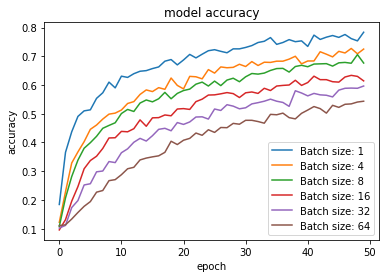

In [31]:
# plot the mean cross validation training accuracy
plt.figure(1)
key_array = []
# plot for each batch size
for key in model_results_accuracy:
    plt.plot(model_results_accuracy[key])
    key_array.append("Batch size: "+str(key))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(key_array, loc='lower right')
plt.show()

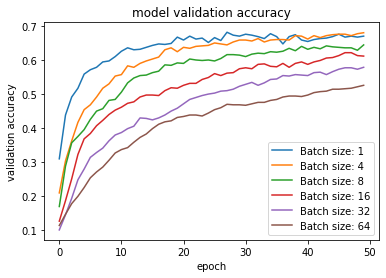

In [32]:
# plot the mean cross validation testing accuracy
plt.figure(2)
key_array = []
# plot for each batch size
for key in model_results_validation_accuracy:
    plt.plot(model_results_validation_accuracy[key])
    key_array.append("Batch size: "+str(key))
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(key_array, loc='lower right')
plt.show()

### **QUESTION 2b)** ###

In [100]:
# get the median training times for each epoch for the respective batch sizes
median_times = []
# iterate through the epoch time dictionary.
for key in epoch_times_dict:
  epoch_times_dict[key] = statistics.median(epoch_times_dict[key])
  median_times.append(epoch_times_dict[key])

median_times_dataframe = pd.DataFrame()
median_times_dataframe['Batch_sizes'] = Batch_sizes
median_times_dataframe['median_epoch_times'] = median_times
median_times_dataframe

,Batch_sizes,median_epoch_times
0,1,0.874394
1,4,0.229945
2,8,0.153851
3,16,0.083358
4,32,0.061521
5,64,0.058546


### **QUESTION 2c)** ##

In [101]:
# get the model results based on all three folds. 
model_results_final_accuracy = {}
model_results_final_validation_accuracy = {}
model_results_final_loss = {}
model_results_final_validation_loss = {}
for key in model_results:
    model_results_final_accuracy[key] = max(model_results_accuracy[key])
    model_results_final_loss[key] = min(model_results_loss[key])
    model_results_final_validation_accuracy[key] = max(model_results_validation_accuracy[key])
    model_results_final_validation_loss[key] = min(model_results_validation_loss[key])

In [102]:
# get model accuracies as well as validation accuracies. 
accuracies = []
validation_accuracies = []
loss = []
validation_loss = []
for key in model_results:
    accuracies.append(model_results_final_accuracy[key])
    validation_accuracies.append(model_results_final_validation_accuracy[key])
    loss.append(model_results_final_loss[key])
    validation_loss.append(model_results_final_validation_loss[key])

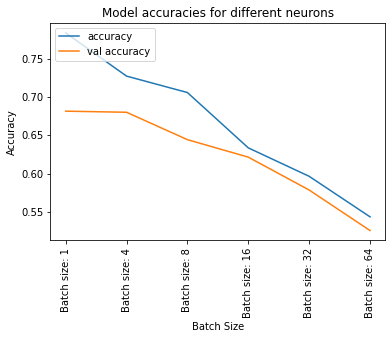

In [103]:
# plot for best model accuracy for training and validation for all batch sizes
plt.figure(1)
plt.plot(key_array,accuracies,label="accuracy")
plt.plot(key_array,validation_accuracies,label="val accuracy")
plt.title('Model accuracies for different neurons')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend(['accuracy', 'val accuracy'], loc='upper left') 
plt.show()

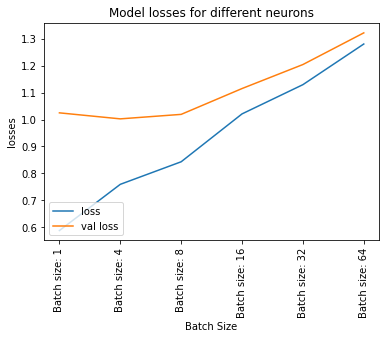

In [104]:
# plot for lowest model loss for training and validation loss for all batch sizes
plt.figure(2)
plt.plot(key_array,loss,label="loss")
plt.plot(key_array,validation_loss,label="val loss")
plt.title('Model losses for different neurons')
plt.xlabel('Batch Size')
plt.ylabel('losses')
plt.xticks(rotation=90) 
plt.legend(['loss', 'val loss'], loc='lower left') 
plt.show()

Answered in report

### **QUESTION 2d)** ###

Answered in the report

### **QUESTION 2e)** ###

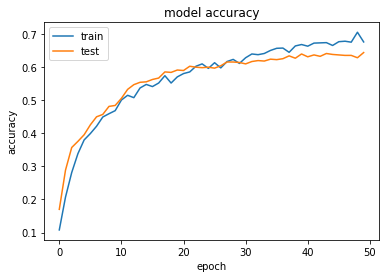

In [105]:
# model accuracy for best model
plt.figure(1)
plt.plot(model_results_accuracy[8])
plt.plot(model_results_validation_accuracy[8])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

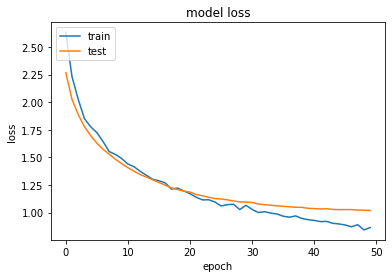

In [106]:
plt.figure(2)
plt.plot(model_results_loss[8])
plt.plot(model_results_validation_loss[8])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **QUESTION 3**

### **QUESTION 3a)** ###

In [133]:
# k fold cross validation for different number of neurons
def K_fold_cross_validation_neurons(no_folds,no_epochs,batch_size,X,Y,hidden_neurons,epoch_times_dict):
  print("Model training for:")
  print("Number of neurons",hidden_neurons)
  print("Number of epcohs:" ,no_epochs)
  print("No folds used for k-fold cross validation:", no_folds)
  print("")

  #define the number of folds
  kf = KFold(n_splits=no_folds,random_state=None, shuffle=False)
  KFold(n_splits=no_folds, random_state=None, shuffle=False)
  history_results = []
  for train_index, test_index in kf.split(X_train):
      X_train_K, X_test_K = X[train_index], X[test_index]
      y_train_K, y_test_K = Y[train_index], Y[test_index]

      model = Sequential()
      model.add(Dense(hidden_neurons, activation='relu'))
      model.add(Dropout(0.3))
      model.add(Dense(10, activation='softmax'))

      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      tb = time_for_batch()
      te = time_for_epoch()

      history = model.fit(X_train_K, y_train_K,
                          batch_size=batch_size,
                          epochs=no_epochs,
                          verbose=2,
                          use_multiprocessing=False,
                          callbacks = [tb, te],
                          validation_data=(X_test_K, y_test_K))
      epoch_times_dict[hidden_neurons] = te.times
      print("")
      history_results.append(history)
  return history_results

In [134]:
#iterate for different number of neurons sizes
number_of_neurons = [8, 16, 32, 64]
epoch_times_dict_neurons = {}
model_results_neurons = {}
for neurons in number_of_neurons:
  history = K_fold_cross_validation_neurons(3,50,8,X_train,y_train,neurons,epoch_times_dict_neurons)
  # store model history
  model_results_neurons[neurons] = history

Model training for:
Number of neurons 8
Number of epcohs: 50
No folds used for k-fold cross validation: 3

Epoch 1/50
59/59 - 1s - loss: 2.6080 - accuracy: 0.1094 - val_loss: 2.4167 - val_accuracy: 0.1239
Epoch 2/50
59/59 - 0s - loss: 2.4117 - accuracy: 0.1588 - val_loss: 2.2286 - val_accuracy: 0.1752
Epoch 3/50
59/59 - 0s - loss: 2.2154 - accuracy: 0.1996 - val_loss: 2.1013 - val_accuracy: 0.2222
Epoch 4/50
59/59 - 0s - loss: 2.0945 - accuracy: 0.2296 - val_loss: 2.0170 - val_accuracy: 0.2735
Epoch 5/50
59/59 - 0s - loss: 2.0373 - accuracy: 0.2661 - val_loss: 1.9549 - val_accuracy: 0.3034
Epoch 6/50
59/59 - 0s - loss: 1.9671 - accuracy: 0.2682 - val_loss: 1.9035 - val_accuracy: 0.3120
Epoch 7/50
59/59 - 0s - loss: 1.9196 - accuracy: 0.2790 - val_loss: 1.8567 - val_accuracy: 0.3248
Epoch 8/50
59/59 - 0s - loss: 1.9052 - accuracy: 0.2811 - val_loss: 1.8192 - val_accuracy: 0.3590
Epoch 9/50
59/59 - 0s - loss: 1.8647 - accuracy: 0.3004 - val_loss: 1.7834 - val_accuracy: 0.3718
Epoch 10/50

In [135]:
# model statistics
model_results_neurons_accuracy = {}
model_results_neurons_validation_accuracy = {}
model_results_neurons_loss = {}
model_results_neurons_validation_loss = {}
for key in model_results_neurons:
    model_results_neurons_accuracy[key] = []
    model_results_neurons_validation_accuracy[key] = []
    model_results_neurons_loss[key] = []
    model_results_neurons_validation_loss[key] = []
    for results in model_results_neurons[key]:
        model_results_neurons_accuracy[key].append(results.history['accuracy'])
        model_results_neurons_validation_accuracy[key].append(results.history['val_accuracy'])
        model_results_neurons_loss[key].append(results.history['loss'])
        model_results_neurons_validation_loss[key].append(results.history['val_loss'])

In [110]:
# mean model accuracy for different neurons 
for key in model_results_neurons_accuracy:
    model_results_neurons_accuracy[key] = np.asarray(model_results_neurons_accuracy[key]).mean(axis=0)
    model_results_neurons_validation_accuracy[key] = np.asarray(model_results_neurons_validation_accuracy[key]).mean(axis=0)
    model_results_neurons_loss[key] = np.asarray(model_results_neurons_loss[key]).mean(axis=0)
    model_results_neurons_validation_loss[key] = np.asarray(model_results_neurons_validation_loss[key]).mean(axis=0)

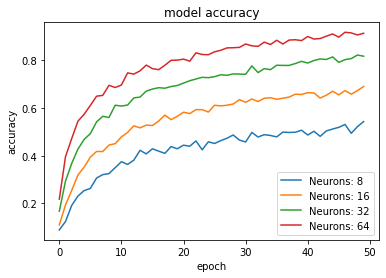

In [111]:
# plot for model accuracy for different neurons 
plt.figure(1)
key_array = []
for key in model_results_neurons_accuracy:
    plt.plot(model_results_neurons_accuracy[key])
    key_array.append("Neurons: "+str(key))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(key_array, loc='lower right')
plt.show()

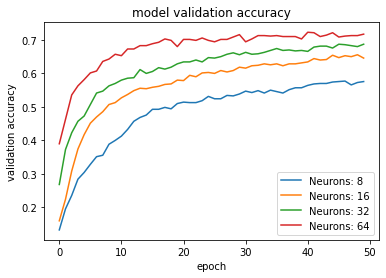

In [112]:
# plot for model validation accuracies for differnt number of neruons
plt.figure(2)
key_array = []
for key in model_results_neurons_validation_accuracy:
    plt.plot(model_results_neurons_validation_accuracy[key])
    key_array.append("Neurons: "+str(key))
plt.title('model validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(key_array, loc='lower right')
plt.show()

### **QUESTION 3b)** ###

In [113]:
# get the results for models with differnt number of neurons 
model_results_neurons_final_accuracy = {}
model_results_neurons_final_validation_accuracy = {}
model_results_neurons_final_loss = {}
model_results_neurons_final_validation_loss = {}
for key in model_results_neurons:
    model_results_neurons_final_accuracy[key] = max(model_results_neurons_accuracy[key])
    model_results_neurons_final_loss[key] = min(model_results_neurons_loss[key])
    model_results_neurons_final_validation_accuracy[key] = max(model_results_neurons_validation_accuracy[key])
    model_results_neurons_final_validation_loss[key] = min(model_results_neurons_validation_loss[key])

In [114]:
accuracies_neurons = []
validation_accuracies_neurons = []
loss_neurons = []
validation_loss_neurons = []
for key in model_results_neurons:
    accuracies_neurons.append(model_results_neurons_final_accuracy[key])
    validation_accuracies_neurons.append(model_results_neurons_final_validation_accuracy[key])
    loss_neurons.append(model_results_neurons_final_loss[key])
    validation_loss_neurons.append(model_results_neurons_final_validation_loss[key])

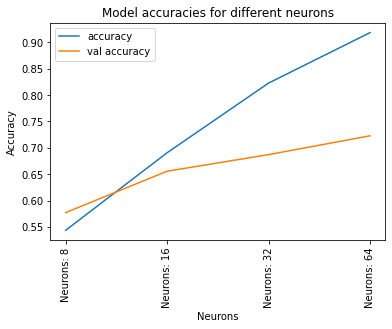

In [115]:
# model accuracy for different number of neurons
plt.figure(1)
plt.plot(key_array,accuracies_neurons,label="accuracy")
plt.plot(key_array,validation_accuracies_neurons,label="val accuracy")
plt.title('Model accuracies for different neurons')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend(['accuracy', 'val accuracy'], loc='upper left') 
plt.show()

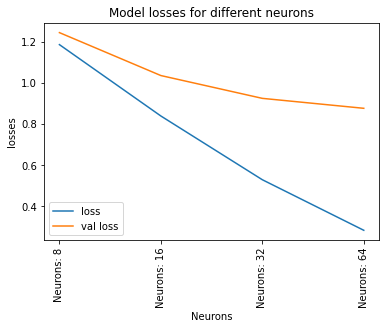

In [116]:
# model loss for different number of neurons 
plt.figure(2)
plt.plot(key_array,loss_neurons,label="loss")
plt.plot(key_array,validation_loss_neurons,label="val loss")
plt.title('Model losses for different neurons')
plt.xlabel('Neurons')
plt.ylabel('losses')
plt.xticks(rotation=90) 
plt.legend(['loss', 'val loss'], loc='lower left') 
plt.show()

Using number of neurons 16 gives best possible model since the validation loss is low as well as the model has a validation accuracy of 72% with minimal overfitting when compared to other models using different number of neurons.

### **QUESTION 3c)** ###

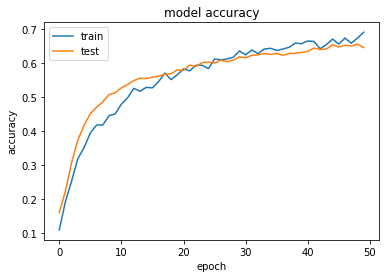

In [117]:
# model accuracy with optimal number of neurons 
plt.figure(1)
plt.plot(model_results_neurons_accuracy[16])
plt.plot(model_results_neurons_validation_accuracy[16])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

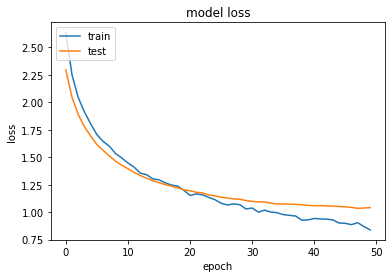

In [118]:
# model loss with optimal number of neurons 
plt.figure(2)
plt.plot(model_results_neurons_loss[16])
plt.plot(model_results_neurons_validation_loss[16])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **QUESTION 3d)** ###

number of epochs can be tuned. Changing the dropout layer. WE ca also consider changing the train test split as well as using shuffling when implementing K-Fold.

## **QUESTION 4**

In [129]:
# model defintion for three layer network. 
def three_layer_K_fold_cross_validation(no_folds,no_epochs,batch_size,X,Y,hidden_neurons):

  kf = KFold(n_splits=no_folds,random_state=None, shuffle=False)
  KFold(n_splits=no_folds, random_state=None, shuffle=False)
  for train_index, test_index in kf.split(X_train):
      X_train_K, X_test_K = X[train_index], X[test_index]
      y_train_K, y_test_K = Y[train_index], Y[test_index]

      model = Sequential()
      model.add(Dense(hidden_neurons, activation='relu'))
      model.add(Dropout(0.3))
      model.add(Dense(hidden_neurons, activation='relu'))
      model.add(Dropout(0.3))
      model.add(Dense(10, activation='softmax'))

      model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

      tb = time_for_batch()
      te = time_for_epoch()

      history = model.fit(X_train_K, y_train_K,
                          batch_size=batch_size,
                          epochs=no_epochs,
                          verbose=2,
                          use_multiprocessing=False,
                          callbacks = [tb, te],
                          validation_data=(X_test_K, y_test_K))
      return history

In [130]:
# train the model
three_layer_network_results = three_layer_K_fold_cross_validation(3,50,8,X_train,y_train,16)

Epoch 1/50
59/59 - 1s - loss: 2.6158 - accuracy: 0.1052 - val_loss: 2.2456 - val_accuracy: 0.1966
Epoch 2/50
59/59 - 0s - loss: 2.2871 - accuracy: 0.1652 - val_loss: 2.0961 - val_accuracy: 0.2479
Epoch 3/50
59/59 - 0s - loss: 2.1535 - accuracy: 0.2103 - val_loss: 2.0064 - val_accuracy: 0.2735
Epoch 4/50
59/59 - 0s - loss: 2.0949 - accuracy: 0.2489 - val_loss: 1.9330 - val_accuracy: 0.3675
Epoch 5/50
59/59 - 0s - loss: 1.9764 - accuracy: 0.3047 - val_loss: 1.8582 - val_accuracy: 0.3974
Epoch 6/50
59/59 - 0s - loss: 1.9646 - accuracy: 0.3090 - val_loss: 1.7885 - val_accuracy: 0.4231
Epoch 7/50
59/59 - 0s - loss: 1.9359 - accuracy: 0.2876 - val_loss: 1.7342 - val_accuracy: 0.4316
Epoch 8/50
59/59 - 0s - loss: 1.8621 - accuracy: 0.3541 - val_loss: 1.6763 - val_accuracy: 0.4487
Epoch 9/50
59/59 - 0s - loss: 1.8133 - accuracy: 0.3648 - val_loss: 1.6219 - val_accuracy: 0.4530
Epoch 10/50
59/59 - 0s - loss: 1.7235 - accuracy: 0.3519 - val_loss: 1.5593 - val_accuracy: 0.4872
Epoch 11/50
59/59 -

### **QUESTION 4a)**

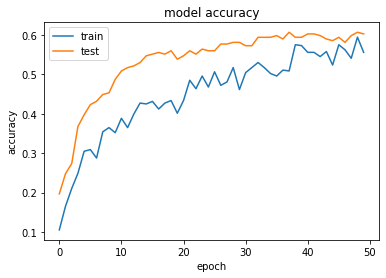

In [131]:
# plot the model accuracy for three layer model 
plt.figure(1)
plt.plot(three_layer_network_results.history['accuracy'])
plt.plot(three_layer_network_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **QUESTION 4b)**

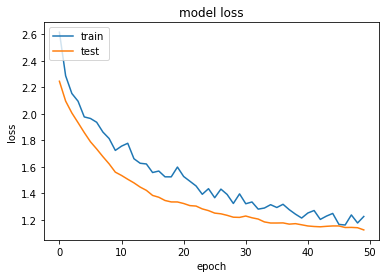

In [132]:
# plot the model loss for three layer model
plt.figure(1)
plt.plot(three_layer_network_results.history['loss'])
plt.plot(three_layer_network_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
# get the model statistics for the model with three layers. 
print("The results for the model with neurons size "+str(16)+" and batch size "+str(1))
print("train accuracy: ",max(three_layer_network_results.history['accuracy']))
print("validation accuracy: ",max(three_layer_network_results.history['val_accuracy']))
print("train loss: ",min(three_layer_network_results.history['loss']))
print("validation loss: ",min(three_layer_network_results.history['val_loss']))

The results for the model with neurons size 16 and batch size 1
train accuracy:  0.5643776655197144
validation accuracy:  0.6367521286010742
train loss:  1.1502273082733154
validation loss:  1.149253249168396


From the above model results we can infer that the model with three layers i.e., with two hidden layers doesn't preform as good as the model with two layers, one hidden layer since both the validation accuracy and the validation loss or not as good as the model with two layers. 

## **QUESTION 5**


### **QUESTION 5a)**

In [124]:
# two layer network without dropout layers
def two_layer_network_without_dropout():
    hidden_neurons = 16

    model = Sequential()
    model.add(Dense(hidden_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    tb = time_for_batch()
    te = time_for_epoch()

    history = model.fit(X_train, y_train,
                        batch_size=4,
                        epochs=50,
                        verbose=2,
                        use_multiprocessing=False,
                        callbacks = [tb, te],
                        validation_data=(X_test, y_test))
    return history

In [125]:
# train the model without dropout layers. 
two_layer_network_without_dropout_results = two_layer_network_without_dropout()

Epoch 1/50
175/175 - 1s - loss: 2.1031 - accuracy: 0.2643 - val_loss: 1.9314 - val_accuracy: 0.3167
Epoch 2/50
175/175 - 0s - loss: 1.6186 - accuracy: 0.4643 - val_loss: 1.6525 - val_accuracy: 0.4200
Epoch 3/50
175/175 - 0s - loss: 1.3763 - accuracy: 0.5371 - val_loss: 1.4894 - val_accuracy: 0.4733
Epoch 4/50
175/175 - 0s - loss: 1.2212 - accuracy: 0.5871 - val_loss: 1.3790 - val_accuracy: 0.5233
Epoch 5/50
175/175 - 0s - loss: 1.1079 - accuracy: 0.6400 - val_loss: 1.3047 - val_accuracy: 0.5533
Epoch 6/50
175/175 - 0s - loss: 1.0186 - accuracy: 0.6757 - val_loss: 1.2440 - val_accuracy: 0.5967
Epoch 7/50
175/175 - 0s - loss: 0.9491 - accuracy: 0.7143 - val_loss: 1.1921 - val_accuracy: 0.6200
Epoch 8/50
175/175 - 0s - loss: 0.8902 - accuracy: 0.7343 - val_loss: 1.1565 - val_accuracy: 0.6233
Epoch 9/50
175/175 - 0s - loss: 0.8410 - accuracy: 0.7429 - val_loss: 1.1308 - val_accuracy: 0.6233
Epoch 10/50
175/175 - 0s - loss: 0.7993 - accuracy: 0.7457 - val_loss: 1.1018 - val_accuracy: 0.6333

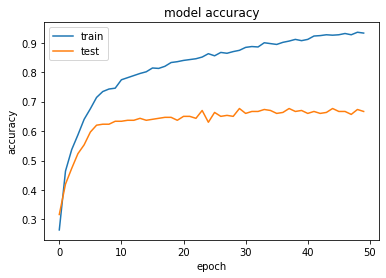

In [126]:
# plot accuracy for model without dropouts 
plt.figure(1)
plt.plot(two_layer_network_without_dropout_results.history['accuracy'])
plt.plot(two_layer_network_without_dropout_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

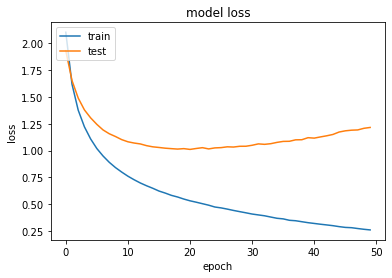

In [127]:
# plot losses for model without dropouts
plt.figure(2)
plt.plot(two_layer_network_without_dropout_results.history['loss'])
plt.plot(two_layer_network_without_dropout_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [128]:
# model statistics
print("The results for the model with neurons size "+str(16)+" and batch size "+str(1))
print("train accuracy: ",max(two_layer_network_without_dropout_results.history['accuracy']))
print("validation accuracy: ",max(two_layer_network_without_dropout_results.history['val_accuracy']))
print("train loss: ",min(two_layer_network_without_dropout_results.history['loss']))
print("validation loss: ",min(two_layer_network_without_dropout_results.history['val_loss']))

The results for the model with neurons size 16 and batch size 1
train accuracy:  0.9357143044471741
validation accuracy:  0.6766666769981384
train loss:  0.2599257230758667
validation loss:  1.0106384754180908


### **QUESTION 5b)**

Answered in report 

### **QUESTION 5c)** 

Answered in the report

# **Regresssion Question PART B**

Regression problem on HDB flats price prediction dataset

### **Package imports and Preprocessing**

In [34]:
SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [35]:
from tensorflow import keras
from tensorflow.keras import layers,optimizers
import keras.backend as K
# from tensorflow.keras.layers import ...

from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup

In [36]:
import pandas as pd
# read dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/NNDL/hdb_price_prediction.csv .csv')
df.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0


In [37]:
# custom r2 score function
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## **QUESTION 1**

### **QUESTION 1a)**

In [38]:
# split data into train and test data
train_data = df[df['year']<=2020]
test_data = df[df['year']>2020]

In [39]:
train_data.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0


In [40]:
test_data.head()

,month,year,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
87371,1,2021,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,07 TO 09,225000.0
87372,1,2021,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,01 TO 03,211000.0
87373,1,2021,216 ANG MO KIO AVENUE 1,Ang Mo Kio,0.994153,7.427003,0.016807,0.006243,"3 ROOM, New Generation",54.333333,73.0,04 TO 06,275888.0
87374,1,2021,223 ANG MO KIO AVENUE 1,Ang Mo Kio,1.349574,7.444314,0.016807,0.006243,"3 ROOM, New Generation",56.083333,67.0,07 TO 09,316800.0
87375,1,2021,223 ANG MO KIO AVENUE 1,Ang Mo Kio,1.349574,7.444314,0.016807,0.006243,"3 ROOM, New Generation",56.000000,67.0,10 TO 12,305000.0


In [41]:
print("train data shape:",train_data.shape)
print("test data shape:", test_data.shape)

train data shape: (87371, 13)
test data shape: (16723, 13)


### **QUESTION 1b)**

In [42]:
# convert dataframe object to tf dataset object
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("resale_price")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


#get train and test data 
train_ds = dataframe_to_dataset(train_data)
test_ds = dataframe_to_dataset(test_data)

In [43]:
# batch the train and test data with batch size 128
batch_size = 128
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

In [44]:
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [45]:
# Categorical feature encoded as integer
month = keras.Input(shape=(1,), name="month",dtype="int64")

# Categorical feature encoded as string
storey_range = keras.Input(shape=(1,), name="storey_range",dtype="string")
flat_model_type = keras.Input(shape=(1,), name="flat_model_type", dtype="string")

# Numerical features
dist_to_nearest_stn = keras.Input(shape=(1,),name="dist_to_nearest_stn")
dist_to_dhoby = keras.Input(shape=(1,),name="dist_to_dhoby")
degree_centrality = keras.Input(shape=(1,),name="degree_centrality")
eigenvector_centrality = keras.Input(shape=(1,),name="eigenvector_centrality")
remaining_lease_years = keras.Input(shape=(1,),name="remaining_lease_years")
floor_area_sqm = keras.Input(shape=(1,),name="floor_area_sqm")

all_inputs = [
    month,
    storey_range,
    flat_model_type,
    dist_to_nearest_stn,
    dist_to_dhoby,
    degree_centrality,
    eigenvector_centrality,
    remaining_lease_years,
    floor_area_sqm
]

# # Integer categorical features
month_encoded = encode_categorical_feature(month, "month", train_ds, False)

# # String categorical features
storey_range_encoded = encode_categorical_feature(storey_range, "storey_range", train_ds, True)
flat_model_type_encoded = encode_categorical_feature(flat_model_type, "flat_model_type", train_ds, True)

# # Numerical features
dist_to_nearest_stn_encoded = encode_numerical_feature(dist_to_nearest_stn,"dist_to_nearest_stn",train_ds)
dist_to_dhoby_encoded = encode_numerical_feature(dist_to_dhoby,"dist_to_dhoby",train_ds)
degree_centrality_encoded = encode_numerical_feature(degree_centrality,"degree_centrality",train_ds)
eigenvector_centrality_encoded = encode_numerical_feature(eigenvector_centrality,"eigenvector_centrality",train_ds)
remaining_lease_years_encoded = encode_numerical_feature(remaining_lease_years,"remaining_lease_years",train_ds)
floor_area_sqm_encoded = encode_numerical_feature(floor_area_sqm,"floor_area_sqm",train_ds)

# conactenate all features
all_features = layers.concatenate(
    [
        month_encoded,
        storey_range_encoded,
        flat_model_type_encoded,
        dist_to_nearest_stn_encoded,
        dist_to_dhoby_encoded,
        degree_centrality_encoded,
        eigenvector_centrality_encoded,
        remaining_lease_years_encoded,
        floor_area_sqm_encoded
    ]
)

In [49]:
#definition for regression model
def regression_model():
    x = layers.Dense(10, activation="relu")(all_features) # input layer with 10 neurons
    output = layers.Dense(1, activation="linear")(x)     # ouput linera layer
    model = keras.Model(all_inputs, output)             
    opt = tf.keras.optimizers.Adam(learning_rate=0.05)    # adam optimizer with learning rate 0.05 
    model.compile(opt, 
            tf.keras.losses.MeanSquaredError(), 
            metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),r2_score]) # metrics used MSE, RMSE and R2 score

    keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

    # model checkpointing 
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/NNDL/regression_model_checkpoint.tf',
        save_weights_only=True,
        monitor='val_loss',
        mode='min',
        save_best_only=True)
    history = model.fit(train_ds, epochs=100, validation_data=test_ds,callbacks=[model_checkpoint_callback])

    return [history,model]


### **QUESTION 1c)**

In [50]:
# train regression model
regression_model_results = regression_model()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 [==============================] - 5s 6ms/step - loss: 199083212800.0000 - mean_squared_error: 199083212800.0000 - root_mean_squared_error: 446187.4062 - r2_score: -7.5834 - val_loss: 207915679744.0000 - val_mean_squared_error: 207915679744.0000 - val_root_mean_squared_error: 455977.7188 - val_r2_score: -7.1463
Epoch 2/100
683/683 [==============================] - 4s 5ms/step - loss: 107596914688.0000 - mean_squared_error: 107596914688.0000 - root_mean_squared_error: 328019.6875 - r2_score: -3.6304 - val_loss: 87474561024.0000 - val_mean_squared_error: 87474561024.0000 - val_root_mean_squared_error: 295761.0000 - val_r2_score: -2.4396
Epoch 3/100
683/683 [==============================] - 4s 5ms/step - loss: 30878132224.0000 - mean_squared_error: 30878132224.0000 - root_mean_squared_error: 175721.7500 - r2_score: -0.3205 - val_loss: 24252661760.0000 - val_mean_squared_error: 24252661760.0000 - val_root_mean_squared_error: 155732.6562 - val_r2_score: 0.0578
Epoch 4/100
683/683 

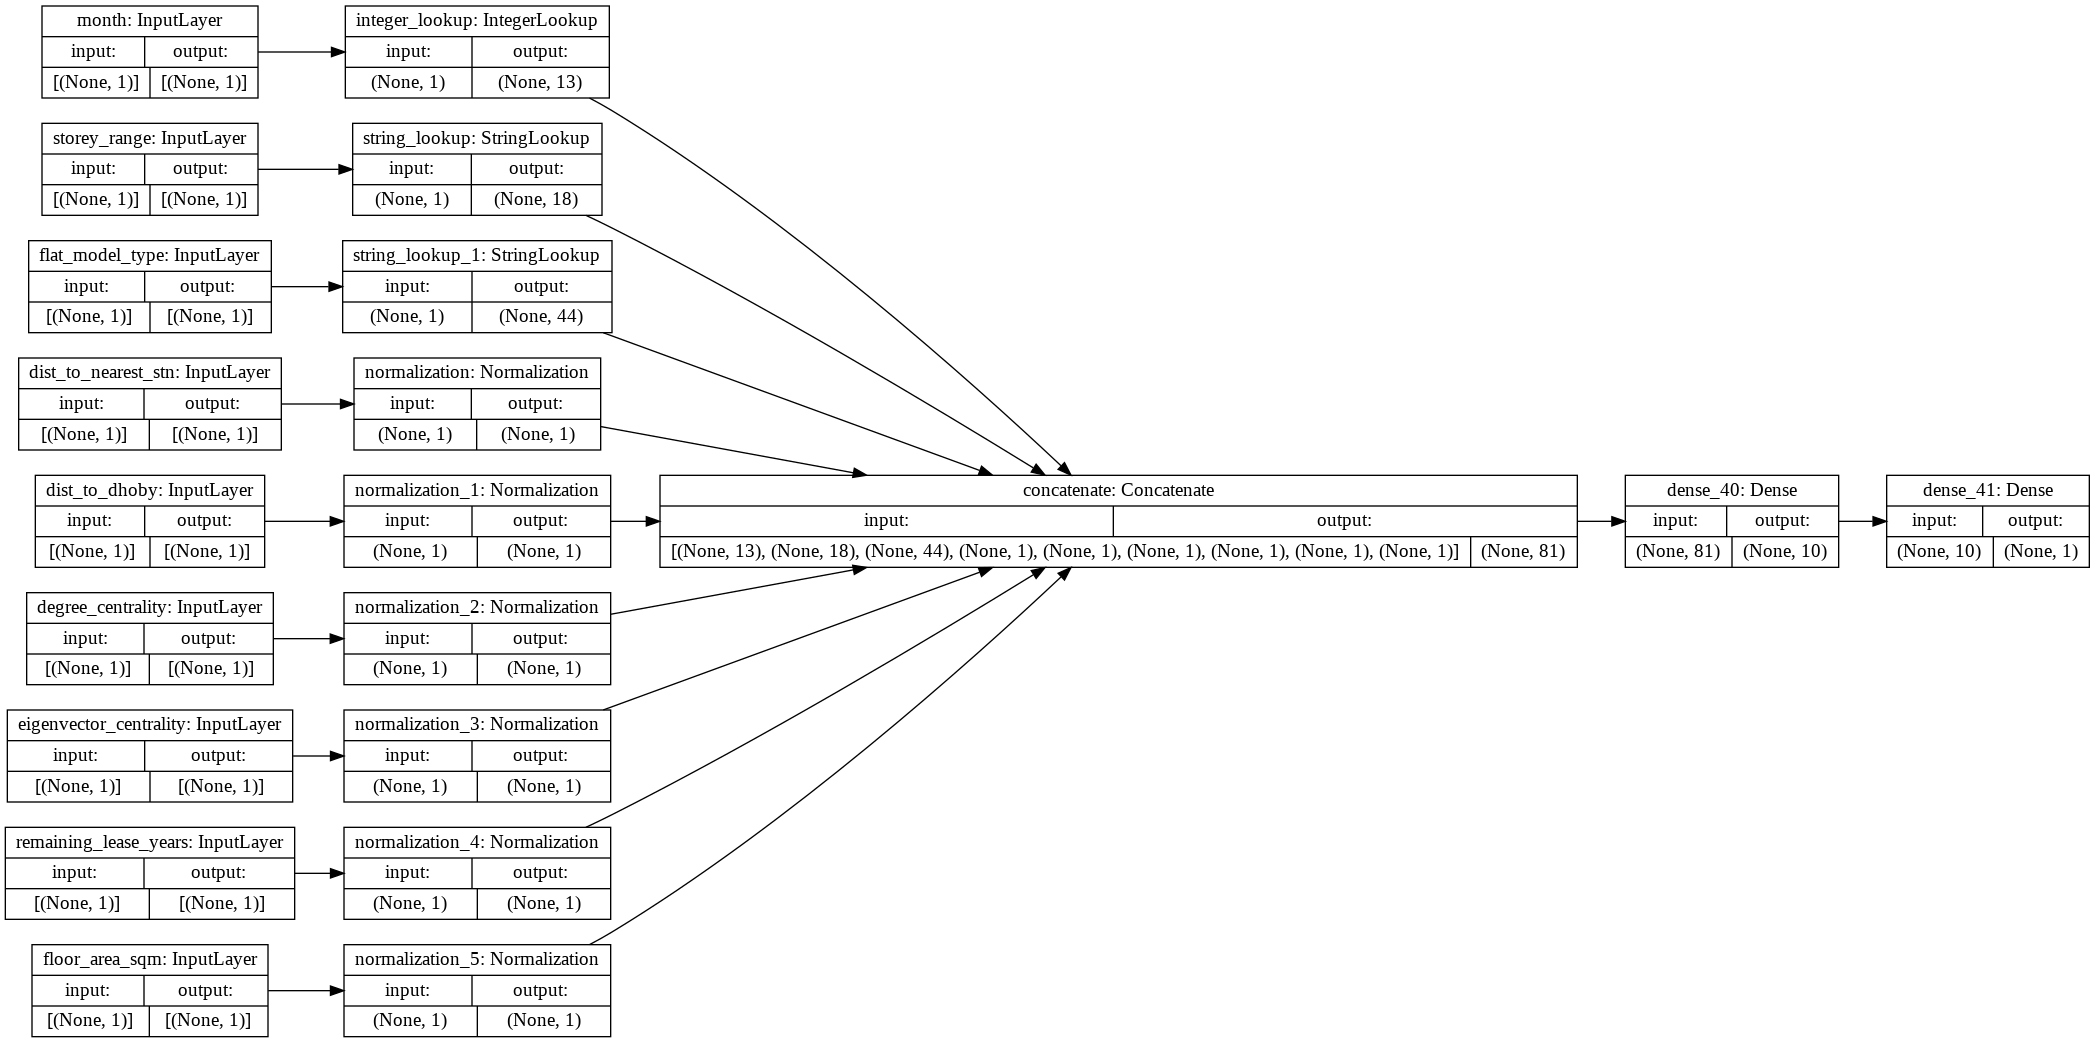

In [52]:
keras.utils.plot_model(regression_model_results[1], show_shapes=True, rankdir="LR")

### **QUESTION 1d)**

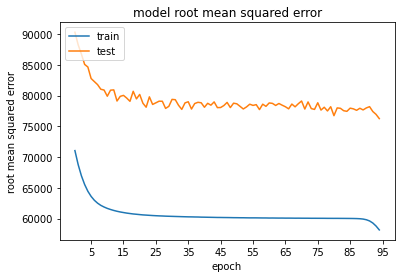

In [53]:
# plot the rmse for training and validation datasets
plt.figure(1)
plt.plot(regression_model_results[0].history['root_mean_squared_error'][5:])
plt.plot(regression_model_results[0].history['val_root_mean_squared_error'][5:])
plt.title('model root mean squared error')
plt.ylabel('root mean squared error')
plt.xlabel('epoch')
plt.xticks([x for x in range(5,100,10)])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **QUESTION 1e)**

In [54]:
# get the epoch with the lowest test error. 
def epoch_with_lowest_test_error(removed_feature_model):
    epoch_number = np.argmin(removed_feature_model.history['val_loss'])
    val_r2_value = removed_feature_model.history['val_r2_score'][epoch_number]
    r2_value = removed_feature_model.history['r2_score'][epoch_number]

    print("The training epoch with lowest test loss is: ",epoch_number+1)
    print("The values for train r2: ",r2_value)
    print("The value for validation r2: ",val_r2_value)

In [55]:
# return statistics of the epoch with lowest test error
epoch_with_lowest_test_error(regression_model_results[0])

The training epoch with lowest test loss is:  100
The values for train r2:  0.8544687032699585
The value for validation r2:  0.7736641764640808


In [56]:
# model statitics 
print("The model results :")
print("train loss: ",min(regression_model_results[0].history['loss']))
print("validation loss: ",min(regression_model_results[0].history['val_loss']))
print("train MSE: ",min(regression_model_results[0].history['mean_squared_error']))
print("validation MSE: ",min(regression_model_results[0].history['val_mean_squared_error']))
print("train RMSE: ",min(regression_model_results[0].history['root_mean_squared_error']))
print("validation RMSE: ",min(regression_model_results[0].history['val_root_mean_squared_error']))
print("train r2 value: ",max(regression_model_results[0].history['r2_score']))
print("validation r2 value: ",max(regression_model_results[0].history['val_r2_score']))

The model results :
train loss:  3383816960.0
validation loss:  5813907456.0
train MSE:  3383816960.0
validation MSE:  5813907456.0
train RMSE:  58170.5859375
validation RMSE:  76248.984375
train r2 value:  0.8544687032699585
validation r2 value:  0.7736641764640808


### **QUESTION 1f)**

In [58]:
# load weights of the epoch with the best model validation loss
regression_model_results[1].load_weights("/content/drive/MyDrive/NNDL/regression_model_checkpoint.tf")

In [59]:
# get a single batch of 128 data points
batch_128_samples = test_ds.take(1)
# convert to list representation
batch_128_samples_list = list(batch_128_samples.as_numpy_iterator())

In [60]:
# get the predictions based on the best model
predictions = regression_model_results[1].predict(batch_128_samples_list[0][0])

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


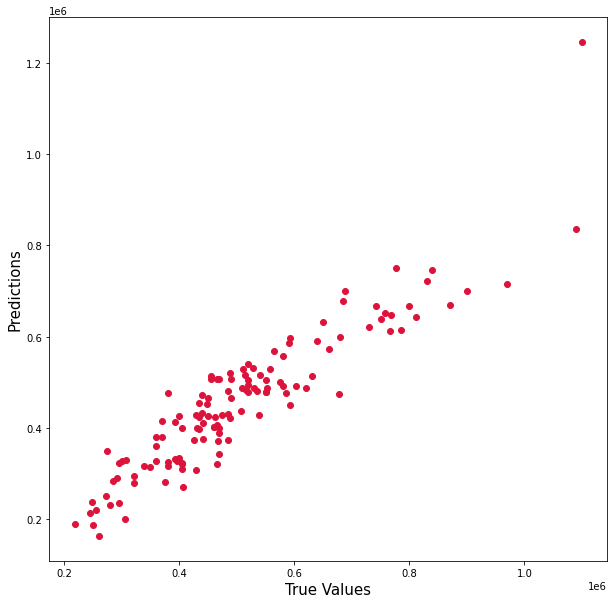

In [61]:
# plot a scatter plot with true values and the predicted values 
plt.figure(figsize=(10,10))
plt.scatter(batch_128_samples_list[0][1], predictions, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
plt.show()

## **QUESTION 2**

### **QUESTION 2a)**

In [63]:
# change the output mode to integer to confirm with the inputs for the embedding layer
def encode_categorical_embedding_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="int")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [64]:
# # Integer categorical features
month_encoded_new = encode_categorical_embedding_feature(month, "month", train_ds, False)

# # String categorical features
storey_range_encoded_new = encode_categorical_embedding_feature(storey_range, "storey_range", train_ds, True)
flat_model_type_encoded_new = encode_categorical_embedding_feature(flat_model_type, "flat_model_type", train_ds, True)

In [65]:
# get the number of categories for each categorical variable. 
num_categories_month = df['month'].nunique()
num_categories_storey_range = df['storey_range'].nunique()
num_categories_falt_model_type = df['flat_model_type'].nunique()

print("NUmber of categories of month: ",num_categories_month)
print("Number of categories of storey range: ",num_categories_storey_range)
print("NUmber of categories of flat model type: ",num_categories_falt_model_type)


NUmber of categories of month:  12
Number of categories of storey range:  17
NUmber of categories of flat model type:  43


In [77]:
# definition for regression model using embedding layer. 
def regression_model_embedding_layer():

    # embedding layers for each of the categorical variables with output dimensions floor(num_categoies/2)
    month_x = layers.Embedding(num_categories_month+1,(num_categories_month+1)//2)(month_encoded_new)
    # flatten layer to convert 3d features to 2d arrays.
    month_x = layers.Flatten()(month_x)
    storey_range_x = layers.Embedding(num_categories_storey_range+1,(num_categories_storey_range+1)//2)(storey_range_encoded_new)
    storey_range_x = layers.Flatten()(storey_range_x)
    flat_model_type_x = layers.Embedding(num_categories_falt_model_type+1,(num_categories_falt_model_type+1)//2)(flat_model_type_encoded_new)
    flat_model_type_x = layers.Flatten()(flat_model_type_x)
    # concatenate the features for it to he inputted to the dense layer. 
    x = layers.concatenate([month_x,storey_range_x,flat_model_type_x,dist_to_nearest_stn_encoded,dist_to_dhoby_encoded,degree_centrality_encoded,eigenvector_centrality_encoded,remaining_lease_years_encoded,floor_area_sqm_encoded])
    x = layers.Dense(10,activation="relu")(x)
    output = layers.Dense(1, activation="linear")(x)
    model = keras.Model(all_inputs, output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.05)
    model.compile(opt, tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),r2_score])
    history = model.fit(train_ds, epochs=100, validation_data=test_ds)

    return [history,model]

### **QUESTION 2b)**

In [79]:
# train the regression model using the embedding layer 
regression_model_embedding_results = regression_model_embedding_layer()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 [==============================] - 8s 8ms/step - loss: 44330467328.0000 - mean_squared_error: 44330467328.0000 - root_mean_squared_error: 210548.0156 - r2_score: -0.9064 - val_loss: 12112044032.0000 - val_mean_squared_error: 12112044032.0000 - val_root_mean_squared_error: 110054.7344 - val_r2_score: 0.5349
Epoch 2/100
683/683 [==============================] - 6s 8ms/step - loss: 7925315584.0000 - mean_squared_error: 7925315584.0000 - root_mean_squared_error: 89024.2422 - r2_score: 0.6614 - val_loss: 10103187456.0000 - val_mean_squared_error: 10103187456.0000 - val_root_mean_squared_error: 100514.6094 - val_r2_score: 0.6091
Epoch 3/100
683/683 [==============================] - 6s 9ms/step - loss: 6873311744.0000 - mean_squared_error: 6873311744.0000 - root_mean_squared_error: 82905.4375 - r2_score: 0.7061 - val_loss: 8986043392.0000 - val_mean_squared_error: 8986043392.0000 - val_root_mean_squared_error: 94794.7422 - val_r2_score: 0.6505
Epoch 4/100
683/683 [==================

### **QUESTION 2c)**

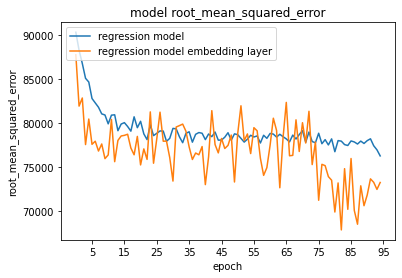

In [80]:
# plot the rmse features for training and validation accuracies
plt.figure(1)
plt.plot(regression_model_results[0].history['val_root_mean_squared_error'][5:])
plt.plot(regression_model_embedding_results[0].history['val_root_mean_squared_error'][5:])
plt.title('model root_mean_squared_error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.xticks([x for x in range(5,100,10)])
plt.legend(['regression model', 'regression model embedding layer'], loc='upper left')
plt.show()

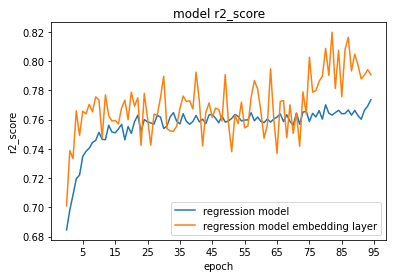

In [81]:
# plot the r2 scores for training and validation 
plt.figure(2)
plt.plot(regression_model_results[0].history['val_r2_score'][5:])
plt.plot(regression_model_embedding_results[0].history['val_r2_score'][5:])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.xticks([x for x in range(5,100,10)])
plt.legend(['regression model', 'regression model embedding layer'], loc='lower right')
plt.show()

In [82]:
# get the epoch with the lowest test error 
epoch_with_lowest_test_error(regression_model_embedding_results[0])

The training epoch with lowest test loss is:  88
The values for train r2:  0.8818665742874146
The value for validation r2:  0.8197755813598633


In [83]:
# model statistics for the regression model
print("The model results when the feature "+str(key)+" is removed")
print("train loss: ",min(regression_model_embedding_results[0].history['loss']))
print("validation loss: ",min(regression_model_embedding_results[0].history['val_loss']))
print("train MSE: ",min(regression_model_embedding_results[0].history['mean_squared_error']))
print("validation MSE: ",min(regression_model_embedding_results[0].history['val_mean_squared_error']))
print("train RMSE: ",min(regression_model_embedding_results[0].history['root_mean_squared_error']))
print("validation RMSE: ",min(regression_model_embedding_results[0].history['val_root_mean_squared_error']))
print("train r2 value: ",max(regression_model_embedding_results[0].history['r2_score']))
print("validation r2 value: ",max(regression_model_embedding_results[0].history['val_r2_score']))

The model results when the feature 64 is removed
train loss:  2640145408.0
validation loss:  4604196352.0
train MSE:  2640145408.0
validation MSE:  4604196352.0
train RMSE:  51382.34375
validation RMSE:  67854.2265625
train r2 value:  0.8861681222915649
validation r2 value:  0.8197755813598633


## **QUESTION 3**

### **QUESTION3a)**

In [84]:
# defintion for the regression model with embedding layers with early stopping. 
def regression_model_embedding_layer_early_stopping():
   # embedding layers for each of the categorical variables with output dimensions floor(num_categoies/2)
    month_x = layers.Embedding(num_categories_month+1,(num_categories_month+1)//2)(month_encoded_new)
    # flatten layer to convert 3d features to 2d arrays.
    month_x = layers.Flatten()(month_x)
    storey_range_x = layers.Embedding(num_categories_storey_range+1,(num_categories_storey_range+1)//2)(storey_range_encoded_new)
    storey_range_x = layers.Flatten()(storey_range_x)
    flat_model_type_x = layers.Embedding(num_categories_falt_model_type+1,(num_categories_falt_model_type+1)//2)(flat_model_type_encoded_new)
    flat_model_type_x = layers.Flatten()(flat_model_type_x)
    # concatenate the features for it to he inputted to the dense layer. 
    x = layers.concatenate([month_x,storey_range_x,flat_model_type_x,dist_to_nearest_stn_encoded,dist_to_dhoby_encoded,degree_centrality_encoded,eigenvector_centrality_encoded,remaining_lease_years_encoded,floor_area_sqm_encoded])
    x = layers.Dense(10,activation="relu")(x)
    output = layers.Dense(1, activation="linear")(x)
    model = keras.Model(all_inputs, output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.05)
    model.compile(opt, tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),r2_score])

    # callback for early stopping. 
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(train_ds, epochs=100, validation_data=test_ds,callbacks=[callback])

    return [history,model]

In [85]:
# train the regression model. 
regression_model_early_stopping = regression_model_embedding_layer_early_stopping()

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 [==============================] - 5s 5ms/step - loss: 41147527168.0000 - mean_squared_error: 41147527168.0000 - root_mean_squared_error: 202848.5312 - r2_score: -0.7362 - val_loss: 11740476416.0000 - val_mean_squared_error: 11740476416.0000 - val_root_mean_squared_error: 108353.4766 - val_r2_score: 0.5456
Epoch 2/100
683/683 [==============================] - 3s 4ms/step - loss: 7510898176.0000 - mean_squared_error: 7510898176.0000 - root_mean_squared_error: 86665.4375 - r2_score: 0.6798 - val_loss: 9630946304.0000 - val_mean_squared_error: 9630946304.0000 - val_root_mean_squared_error: 98137.3828 - val_r2_score: 0.6286
Epoch 3/100
683/683 [==============================] - 3s 4ms/step - loss: 6402711040.0000 - mean_squared_error: 6402711040.0000 - root_mean_squared_error: 80016.9453 - r2_score: 0.7264 - val_loss: 8126742016.0000 - val_mean_squared_error: 8126742016.0000 - val_root_mean_squared_error: 90148.4453 - val_r2_score: 0.6851
Epoch 4/100
683/683 [=====================

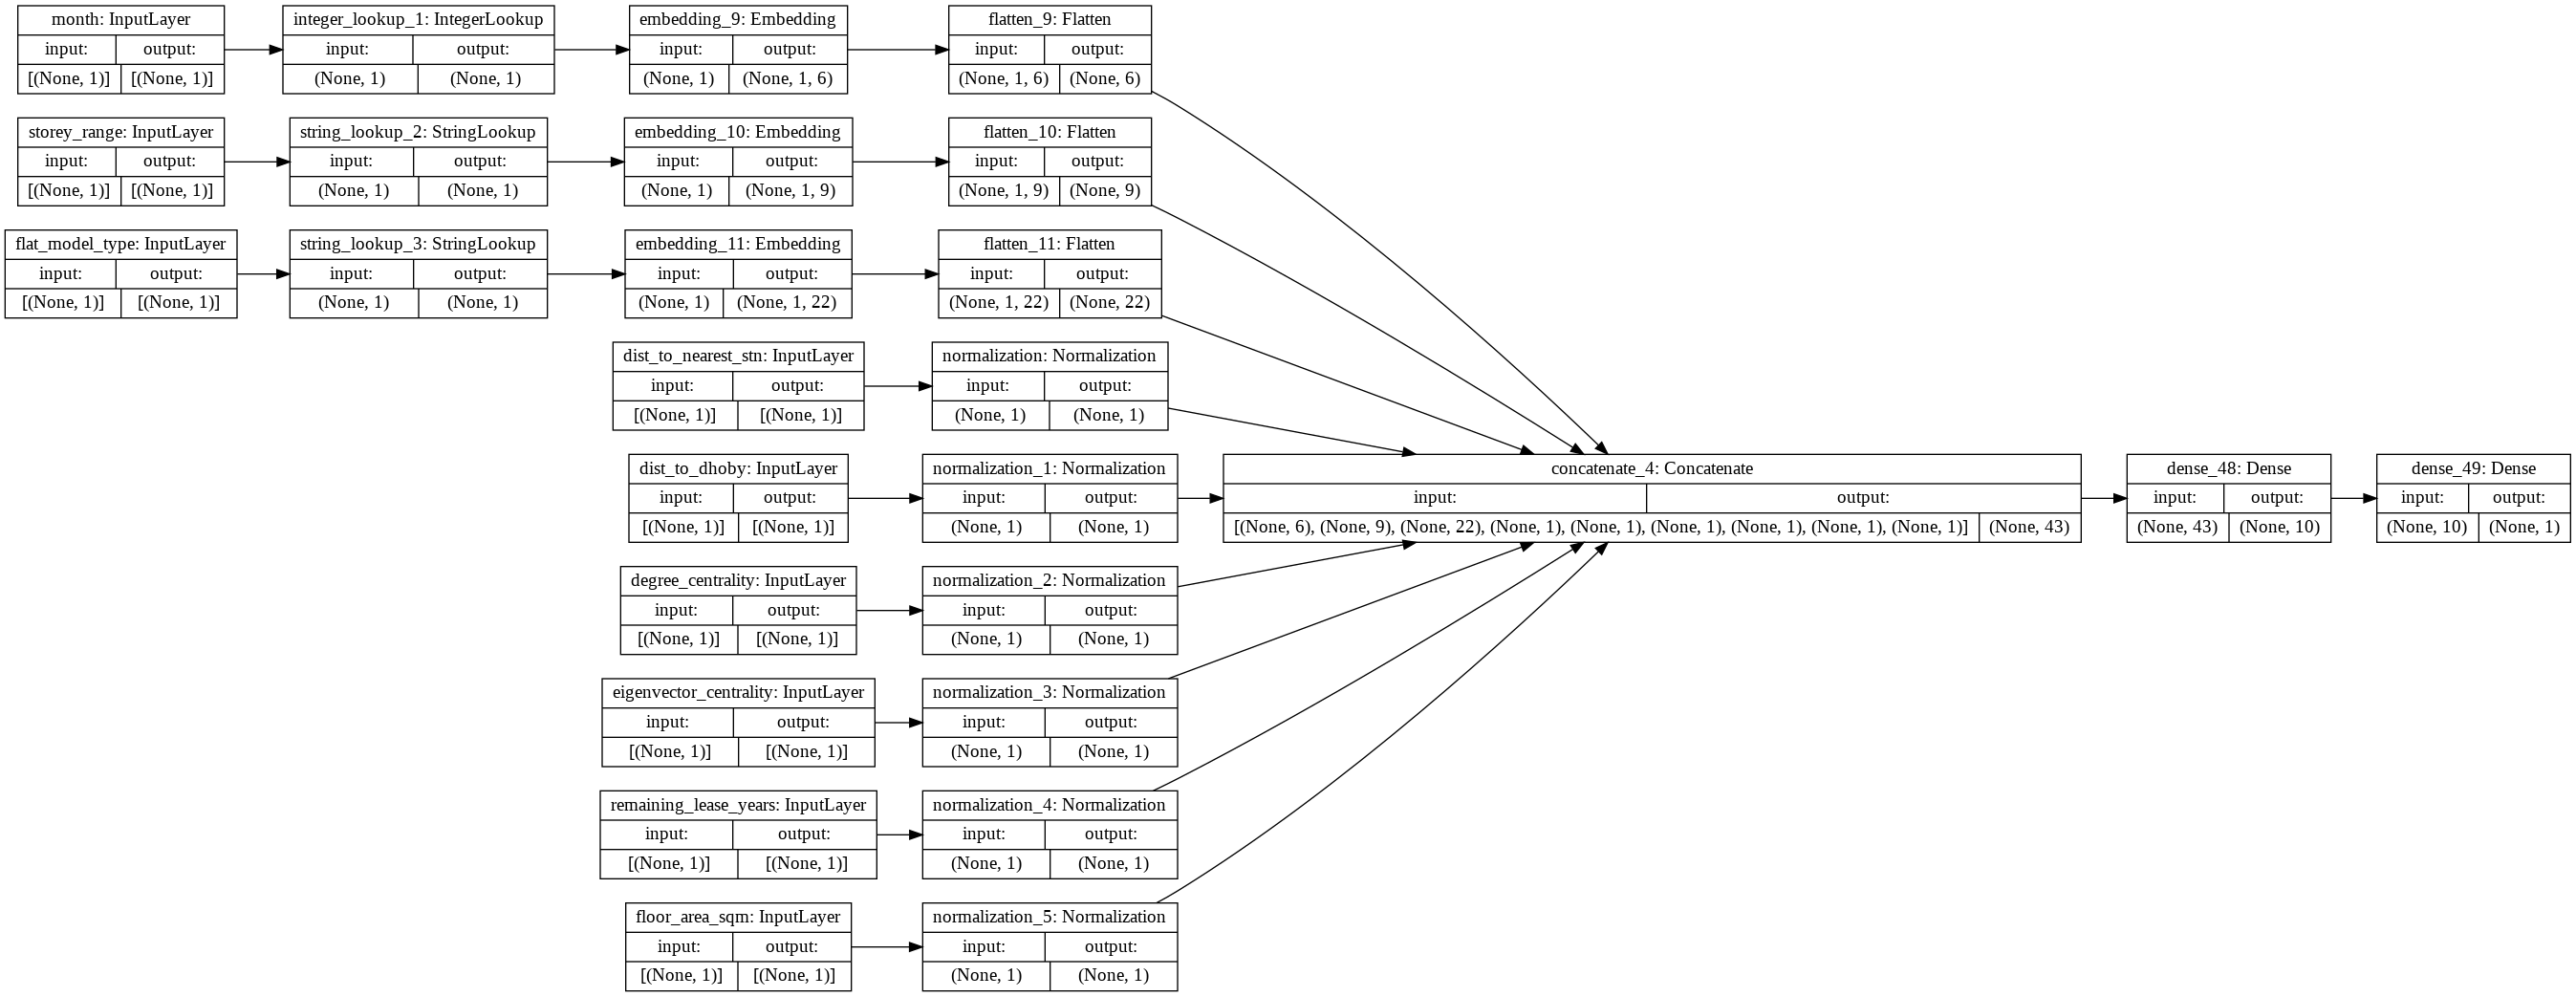

In [86]:
# model architecture
keras.utils.plot_model(regression_model_early_stopping[1], show_shapes=True, rankdir="LR")

In [87]:
# model statistics 
print("The training loss for the model: ",min(regression_model_early_stopping[0].history['loss']))
print("The validation loss for the model: ",min(regression_model_early_stopping[0].history['val_loss']))
print("The mean squared error for the model: ",min(regression_model_early_stopping[0].history['mean_squared_error']))
print("The validaton mean squared error for the model: ",min(regression_model_early_stopping[0].history['val_mean_squared_error']))
print("The root squared error for the model: ",min(regression_model_early_stopping[0].history['root_mean_squared_error']))
print("The validation root squared error for the model: ",min(regression_model_early_stopping[0].history['val_root_mean_squared_error']))
print("The r2 score for the model: ",min(regression_model_early_stopping[0].history['r2_score']))
print("The validation r2 score for the model: ",min(regression_model_early_stopping[0].history['val_r2_score']))

The training loss for the model:  3666469632.0
The validation loss for the model:  5450503168.0
The mean squared error for the model:  3666469632.0
The validaton mean squared error for the model:  5450503168.0
The root squared error for the model:  60551.37890625
The validation root squared error for the model:  73827.5234375
The r2 score for the model:  -0.7361810207366943
The validation r2 score for the model:  0.5455784797668457


In [88]:
month_x = layers.Embedding(num_categories_month+1,(num_categories_month)+1//2)(month_encoded_new)
month_x = layers.Flatten()(month_x)
storey_range_x = layers.Embedding(num_categories_storey_range+1,(num_categories_storey_range)+1//2)(storey_range_encoded_new)
storey_range_x = layers.Flatten()(storey_range_x)
flat_model_type_x = layers.Embedding(num_categories_falt_model_type+1,(num_categories_falt_model_type)+1//2)(flat_model_type_encoded_new)
flat_model_type_x = layers.Flatten()(flat_model_type_x)

features = [
    month_x,
    storey_range_x,
    flat_model_type_x,
    dist_to_nearest_stn_encoded,
    dist_to_dhoby_encoded,
    degree_centrality_encoded,
    eigenvector_centrality_encoded,
    remaining_lease_years_encoded,
    floor_area_sqm_encoded
]

feature_names = [
    "month",
    "storey_range",
    "flat_model_type",
    "dist_to_nearest_stn",
    "dist_to_dhoby",
    "degree_centrality",
    "eigenvector_centrality",
    "remaining_lease_years",
    "floor_area_sqm"
]

In [89]:
# defintion for regression model with embedding layer for rfe
def regression_model_embedding_layer_removed_features(all_features,feature_name):

    x = layers.Dense(10,activation="relu")(all_features)
    output = layers.Dense(1, activation="linear")(x)
    model = keras.Model(all_inputs, output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.05)
    model.compile(opt, tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),r2_score])

    keras.utils.plot_model(model, show_shapes=True, rankdir="LR")
    print("")
    print("Model training when feature "+str(feature_name)+" is removed.")
    print("")
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(train_ds, epochs=100, validation_data=test_ds,callbacks=[callback])

    return [history,model]

### **QUESTION 3b)**

In [90]:
# defintion for recursive feature elimination
def rfe(feature_list,feature_names,minimum_val_root_mean_sqaured_error,df_list,best_model):
    print("length of features:",len(feature_list))
    removed_feature = {}
    removed_feature_list = {}
    removed_feature_name = {}
    for i in range(len(feature_list)):
        # eliminate the feature by iterating through the feature list
        features_list_new = feature_list[:i]+feature_list[i+1:]
        # keeping track of feature names
        features_names_new = feature_names[:i]+feature_names[i+1:]
        # keep track of names of features
        removed_feature_name[feature_names[i]] = features_names_new
        removed_feature_list[feature_names[i]] = features_list_new
        # concatenate the feature list to be inputted to the model
        features_list_concatenate = layers.concatenate(features_list_new)
        # train the model using the new features
        removed_feature[feature_names[i]] = regression_model_embedding_layer_removed_features(features_list_concatenate,feature_names[i])
        dummy_list = [features_names_new,feature_names[i],len(feature_list),min(removed_feature[feature_names[i]][0].history['val_loss']),min(removed_feature[feature_names[i]][0].history['root_mean_squared_error']),min(removed_feature[feature_names[i]][0].history['val_root_mean_squared_error'])]
        # dummy_list.append(features_names_new)
        # dummy_list.append(feature_names[i])
        # dummy_list.append(len(feature_list))
        # dummy_list.append(min(removed_feature[feature_names[i]][0].history['val_loss']))
        # dummy_list.append(min(removed_feature[feature_names[i]][0].history['root_mean_squared_error']))
        # dummy_list.append(min(removed_feature[feature_names[i]][0].history['val_root_mean_squared_error']))
        
        # append the list to dataframe. 
        df_list.append(dummy_list)

    minimum_val_rmse = minimum_val_root_mean_sqaured_error
    minimum = 10000000000000000000000000
    min_key = 1
    # get the key for the lowest val rmse for each of the model trained
    for key in removed_feature:
        if(min(removed_feature[key][0].history['val_root_mean_squared_error'])<minimum):
            minimum = min(removed_feature[key][0].history['val_root_mean_squared_error'])
            min_key = key
    # compare the currrent best performance with the previous model performance. 
    if(minimum<minimum_val_rmse and len(removed_feature_list[min_key])>1):
        # if it is better call the recursive function again to perform rfe on the reduces set of features.
        minimum_loss = minimum
        best_model = [removed_feature[min_key],removed_feature_name[min_key],min_key]
        rfe(removed_feature_list[min_key],removed_feature_name[min_key],minimum_loss,df_list,best_model)
    # return current best model as well as the previous best model. 
    return [removed_feature[min_key],best_model]


In [91]:
# execute the rfe function
df_list = []
best_model = []
best_model_rfe = rfe(features,feature_names,min(regression_model_early_stopping[0].history['val_root_mean_squared_error']),df_list,best_model)

length of features: 9

Model training when feature month is removed.

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['year', 'full_address', 'nearest_stn'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


683/683 [==============================] - 62s 4ms/step - loss: 40218042368.0000 - mean_squared_error: 40218042368.0000 - root_mean_squared_error: 200544.3594 - r2_score: -0.7389 - val_loss: 11876880384.0000 - val_mean_squared_error: 11876880384.0000 - val_root_mean_squared_error: 108981.1016 - val_r2_score: 0.5414
Epoch 2/100
683/683 [==============================] - 4s 6ms/step - loss: 7953181184.0000 - mean_squared_error: 7953181184.0000 - root_mean_squared_error: 89180.6094 - r2_score: 0.6605 - val_loss: 9963803648.0000 - val_mean_squared_error: 9963803648.0000 - val_root_mean_squared_error: 99818.8516 - val_r2_score: 0.6138
Epoch 3/100
683/683 [==============================] - 3s 4ms/step - loss: 7063944192.0000 - mean_squared_error: 7063944192.0000 - root_mean_squared_error: 84047.2734 - r2_score: 0.6980 - val_loss: 8681636864.0000 - val_mean_squared_error: 8681636864.0000 - val_root_mean_squared_error: 93175.3047 - val_r2_score: 0.6634
Epoch 4/100
683/683 [====================

In [92]:
# model statistics
print("Original model results with 9 features:")
print("model rmse: ",min(regression_model_early_stopping[0].history['root_mean_squared_error']))
print("model mse: ",min(regression_model_early_stopping[0].history['mean_squared_error']))
print("model r2 score: ",min(regression_model_early_stopping[0].history['r2_score']))
print("model validation rmse: ",min(regression_model_early_stopping[0].history['val_root_mean_squared_error']))
print("model validation mse: ",min(regression_model_early_stopping[0].history['val_mean_squared_error']))
print("model validation r2 score: ",min(regression_model_early_stopping[0].history['val_r2_score']))

Original model results with 9 features:
model rmse:  60551.37890625
model mse:  3666469632.0
model r2 score:  -0.7361810207366943
model validation rmse:  73827.5234375
model validation mse:  5450503168.0
model validation r2 score:  0.5455784797668457


In [93]:
df_features = pd.DataFrame(df_list,columns=['Features_used_for_training','Feature_removed','Total_number_of_features','validation_loss','root_mean_squared_error','val_root_mean_squared_error'])

In [94]:
# dataframe to print the statistics
df_features

,Features_used_for_training,Feature_removed,Total_number_of_features,validation_loss,root_mean_squared_error,val_root_mean_squared_error
0,"[storey_range, flat_model_type, dist_to_neares...",month,9,5.337171e+09,60650.593750,73055.945312
1,"[month, flat_model_type, dist_to_nearest_stn, ...",storey_range,9,6.169030e+09,65784.953125,78543.171875
2,"[month, storey_range, dist_to_nearest_stn, dis...",flat_model_type,9,5.730205e+09,57365.332031,75698.117188
3,"[month, storey_range, flat_model_type, dist_to...",dist_to_nearest_stn,9,6.268960e+09,66050.625000,79176.765625
4,"[month, storey_range, flat_model_type, dist_to...",dist_to_dhoby,9,8.002279e+09,80781.734375,89455.460938
5,"[month, storey_range, flat_model_type, dist_to...",degree_centrality,9,4.202641e+09,53982.121094,64827.777344
6,"[month, storey_range, flat_model_type, dist_to...",eigenvector_centrality,9,4.375159e+09,52717.816406,66144.984375
7,"[month, storey_range, flat_model_type, dist_to...",remaining_lease_years,9,5.519778e+09,59252.871094,74295.210938
8,"[month, storey_range, flat_model_type, dist_to...",floor_area_sqm,9,4.589663e+09,55681.003906,67747.054688
9,"[storey_range, flat_model_type, dist_to_neares...",month,8,4.425053e+09,54255.441406,66521.070312


In [95]:
min(regression_model_early_stopping[0].history['root_mean_squared_error'])

60551.37890625

### **QUESTION 3c)**

In [96]:
# print the feature removes and the features used in the best model.
print("feature removed for improving model performance: ",best_model_rfe[1][2])
print("features used to train the model: ",best_model_rfe[1][1])

feature removed for improving model performance:  degree_centrality
features used to train the model:  ['month', 'storey_range', 'flat_model_type', 'dist_to_nearest_stn', 'dist_to_dhoby', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']


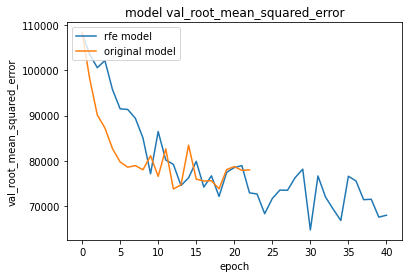

In [97]:
# plot the val rmse for original model as well as the model from rfe
plt.figure(1)
plt.plot(best_model_rfe[1][0][0].history['val_root_mean_squared_error'])
plt.plot(regression_model_early_stopping[0].history['val_root_mean_squared_error'])
plt.title('model val_root_mean_squared_error')
plt.ylabel('val_root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['rfe model', 'original model'], loc='upper left')
plt.show()

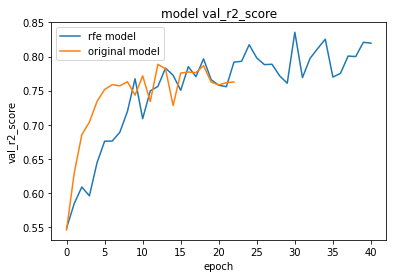

In [98]:
# plot val r2 score from original model as well as model from rfe
plt.figure(1)
plt.plot(best_model_rfe[1][0][0].history['val_r2_score'])
plt.plot(regression_model_early_stopping[0].history['val_r2_score'])
plt.title('model val_r2_score')
plt.ylabel('val_r2_score')
plt.xlabel('epoch')
plt.legend(['rfe model', 'original model'], loc='upper left')
plt.show()

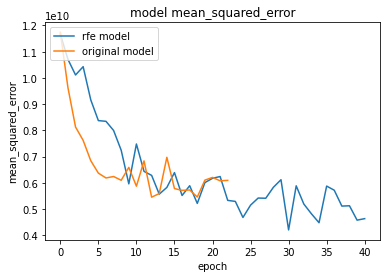

In [99]:
# plot val mse from original model as well as model from rfe
plt.figure(1)
plt.plot(best_model_rfe[1][0][0].history['val_mean_squared_error'])
plt.plot(regression_model_early_stopping[0].history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['rfe model', 'original model'], loc='upper left')
plt.show()